In [1]:
##################################################
#                   Part 1
# Chatper 2
##################################################

import torch

torch.version.__version__

a = torch.ones(3, 3)
b = torch.ones(3, 3)

a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [2]:

##################################################
#       Pretrained Neural networks (Resnet)
##################################################

import torch
from torchvision import models, transforms
from PIL import Image
import torch


In [3]:

# Load pre-trained ResNet101 model
resnet = models.resnet101(pretrained=True)
resnet.eval()

# Define image preprocessing pipeline
preprocess = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

/opt/anaconda3/envs/DSA_5900/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/DSA_5900/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


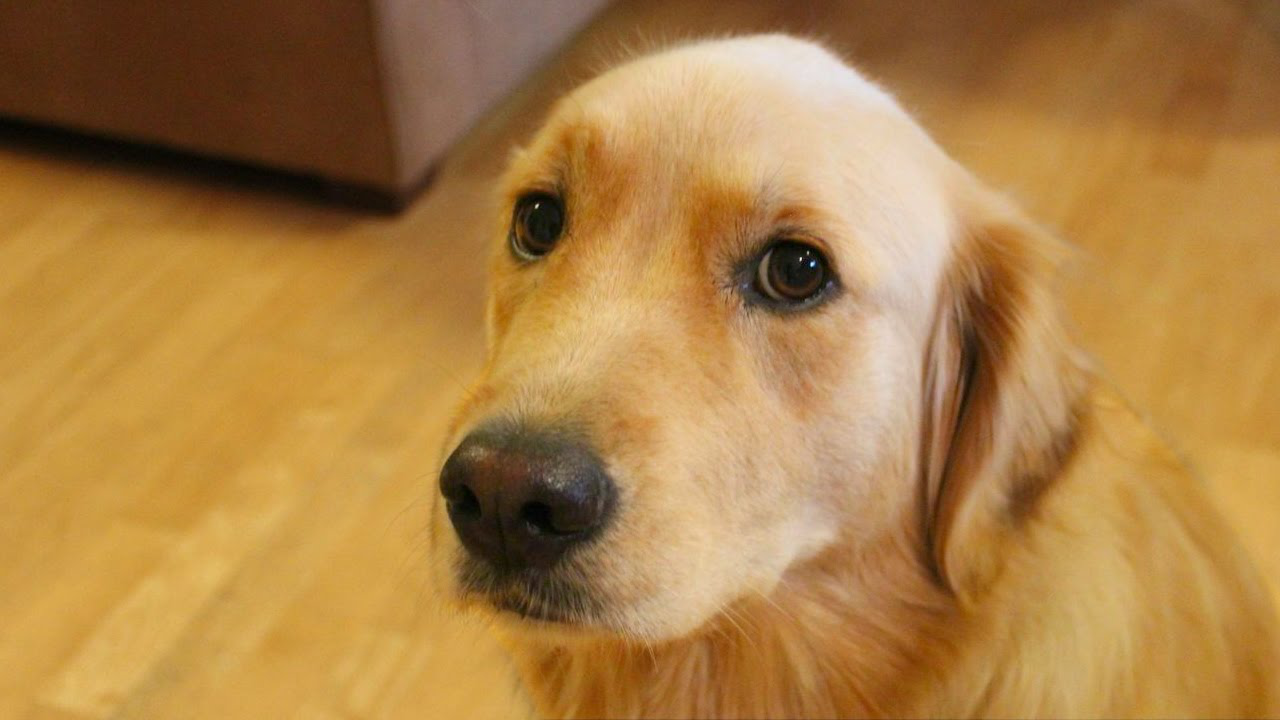

In [5]:

# Load and preprocess the image
img_path = "../data/p1ch2/bobby.jpg"
img = Image.open(img_path)
img



In [6]:
img_t = preprocess(img)
img_t

tensor([[[-0.6281, -0.6623, -0.6794,  ...,  0.0056, -0.0287, -0.0629],
         [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0227,  0.0056],
         [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0569,  0.0569],
         ...,
         [ 1.4440,  1.4269,  1.4783,  ...,  0.6049,  0.6221,  0.6906],
         [ 1.4269,  1.4440,  1.4783,  ...,  0.6906,  0.6734,  0.7077],
         [ 1.4612,  1.4783,  1.5125,  ...,  0.6906,  0.7248,  0.7419]],

        [[-1.2829, -1.2829, -1.2829,  ..., -0.6352, -0.6702, -0.7052],
         [-1.2654, -1.2479, -1.2654,  ..., -0.6176, -0.6527, -0.7052],
         [-1.2479, -1.2479, -1.2654,  ..., -0.6176, -0.6001, -0.6527],
         ...,
         [ 0.7829,  0.8004,  0.8704,  ..., -0.3025, -0.2675, -0.2150],
         [ 0.7654,  0.8354,  0.9055,  ..., -0.2150, -0.2150, -0.1625],
         [ 0.8004,  0.8529,  0.9230,  ..., -0.1800, -0.1275, -0.0749]],

        [[-1.4907, -1.4559, -1.4210,  ..., -1.0376, -1.0898, -1.1421],
         [-1.5081, -1.4559, -1.4210,  ..., -1

In [7]:

batch_t = torch.unsqueeze(img_t, 0)  # Add batch dimension
print(batch_t.shape)

torch.Size([1, 3, 224, 224])


In [8]:

# Perform inference
out = resnet(batch_t)
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5183e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0870e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [11]:

# Load ImageNet class labels
with open("../data/p1ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

len(labels)


1000

In [12]:
labels[10]

'brambling, Fringilla montifringilla'

In [13]:

# Get the top predicted class
_, index = torch.max(out, 1)
out[0, 207]

tensor(15.6744, grad_fn=<SelectBackward0>)

In [14]:

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [15]:

# Display top-1 prediction
predicted_label = labels[index[0]]
predicted_confidence = percentage[index[0]].item()
print(f"Top Prediction: {predicted_label} ({predicted_confidence:.2f}%)")


Top Prediction: golden retriever (96.29%)


In [16]:

# Get top-5 predictions
_, indices = torch.sort(out, descending=True)
indices

tensor([[207, 208, 219, 168, 852, 205, 213, 162, 539, 215, 220, 434, 159, 212,
         231, 214, 165, 227, 263, 216, 176, 222, 805, 175, 211, 218, 209, 257,
         244, 154, 164, 552, 230, 411, 700, 161, 273, 999, 260, 163, 206, 185,
         793, 184, 238, 160, 931, 239, 166, 589, 232, 259, 736, 543, 264, 929,
         234, 266, 879, 167, 204, 752, 192, 200, 251, 223, 478, 256, 182, 240,
         882, 705, 998, 267, 534, 414, 452, 813, 515, 170, 799, 765, 767, 638,
         961, 415, 797, 191, 578, 757, 785, 904, 156, 236, 868, 641, 722, 235,
         659, 247, 990, 876, 428, 462, 193, 750, 910, 197, 217, 673, 828, 591,
         549, 735, 808, 226, 202, 248, 178, 463, 574, 948, 221, 265, 776, 618,
         255, 241, 898, 151, 987, 811, 789, 433, 201, 761, 731, 496, 779, 939,
         472, 153, 579, 158, 522, 429, 740, 448, 558, 693, 502, 676, 177, 189,
         615, 930, 840, 224, 559, 947, 196, 824, 774, 733, 246, 443, 293, 953,
         171, 519, 210, 249, 655, 253, 180, 199, 508

In [17]:

top5_predictions = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

# Display top-5 predictions
print("Top 5 Predictions:")
for label, confidence in top5_predictions:
    print(f"{label}: {confidence:.2f}%")

Top 5 Predictions:
golden retriever: 96.29%
Labrador retriever: 2.81%
cocker spaniel, English cocker spaniel, cocker: 0.28%
redbone: 0.21%
tennis ball: 0.12%


In [18]:


##################################################
#                   Cycle GAN
##################################################

import torch
import torch.nn as nn


class ResNetBlock(nn.Module):
    def __init__(self, dim):
        """
        A single Residual Block used in the generator.

        Args:
        - dim (int): The number of input and output channels.
        """
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        """
        Builds the sequential convolutional block inside the residual block.

        Structure:
        - Reflection padding (1 pixel)
        - Conv2D (3x3, no padding because of reflection padding)
        - Instance Normalization
        - ReLU activation
        - Reflection padding again
        - Another Conv2D (3x3, same channels)
        - Instance Normalization
        """
        conv_block = []

        # Step 1: Reflection padding
        conv_block += [nn.ReflectionPad2d(1)]
        # Adds a 1-pixel border around the input to keep spatial dimensions unchanged
        # Output shape: (B, dim, H+2, W+2)

        # Step 2: First Convolution Layer
        conv_block += [
            nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
            # 3x3 convolution with no padding (padding=0) since we already applied reflection padding
            # Output shape: (B, dim, H, W)
            nn.InstanceNorm2d(dim),  # Normalization per channel
            nn.ReLU(True),  # ReLU activation function: f(x) = max(0, x)
        ]

        # Step 3: Reflection Padding Again
        conv_block += [nn.ReflectionPad2d(1)]
        # Output shape: (B, dim, H+2, W+2)

        # Step 4: Second Convolution Layer
        conv_block += [
            nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
            # Another 3x3 convolution, keeping the number of channels unchanged
            # Output shape: (B, dim, H, W)
            nn.InstanceNorm2d(dim),  # Normalize output again
        ]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        """
        Forward pass through the residual block.

        Mathematically:
        - Let x be the input tensor.
        - F(x) is the output of the convolutional layers.
        - The residual connection computes: y = x + F(x)

        This skip connection helps retain input features.
        """
        out = x + self.conv_block(
            x
        )  # Element-wise addition of input and transformed output
        return out


class ResNetGenerator(nn.Module):
    def __init__(
        self,
        input_channels=3,
        output_channels=3,
        base_filters=64,
        num_residual_blocks=9,
    ):
        """
        A ResNet-based generator network for image-to-image translation.

        Args:
        - input_channels (int): Number of input channels (default: 3 for RGB)
        - output_channels (int): Number of output channels (default: 3 for RGB)
        - base_filters (int): Number of filters in the first convolutional layer.
        - num_residual_blocks (int): Number of residual blocks in the middle of the network.
        """
        assert num_residual_blocks >= 0
        super(ResNetGenerator, self).__init__()

        self.input_channels = input_channels
        self.output_channels = output_channels
        self.base_filters = base_filters

        # Step 1: Initial Convolution Block
        layers = [
            nn.ReflectionPad2d(
                3
            ),  # Adds 3 pixels of padding around the image to preserve spatial size
            nn.Conv2d(
                input_channels, base_filters, kernel_size=7, padding=0, bias=True
            ),
            # 7x7 convolution to capture large context information
            # Output shape: (B, 64, H, W)
            nn.InstanceNorm2d(base_filters),
            nn.ReLU(True),
        ]

        # Step 2: Downsampling Layers (Encoder)
        num_downsampling_layers = 2
        for i in range(num_downsampling_layers):
            filter_multiplier = 2**i
            layers += [
                nn.Conv2d(
                    base_filters * filter_multiplier,
                    base_filters * filter_multiplier * 2,
                    kernel_size=3,
                    stride=2,
                    padding=1,
                    bias=True,
                ),
                # Stride=2 halves spatial resolution (H → H/2, W → W/2)
                nn.InstanceNorm2d(base_filters * filter_multiplier * 2),
                nn.ReLU(True),
            ]

        # Step 3: Bottleneck (Residual Blocks)
        bottleneck_filters = 2**num_downsampling_layers * base_filters
        for _ in range(num_residual_blocks):
            layers += [ResNetBlock(bottleneck_filters)]
            # Each residual block maintains spatial resolution

        # Step 4: Upsampling Layers (Decoder)
        for i in range(num_downsampling_layers):
            filter_multiplier = 2 ** (num_downsampling_layers - i)
            layers += [
                nn.ConvTranspose2d(
                    base_filters * filter_multiplier,
                    int(base_filters * filter_multiplier / 2),
                    kernel_size=3,
                    stride=2,
                    padding=1,
                    output_padding=1,
                    bias=True,
                ),
                # Stride=2 doubles spatial resolution (H/2 → H, W/2 → W)
                nn.InstanceNorm2d(int(base_filters * filter_multiplier / 2)),
                nn.ReLU(True),
            ]

        # Step 5: Final Convolutional Layer
        layers += [nn.ReflectionPad2d(3)]  # Padding before final conv
        layers += [nn.Conv2d(base_filters, output_channels, kernel_size=7, padding=0)]
        # Maps back to RGB channels
        layers += [nn.Tanh()]  # Tanh activation normalizes pixel values to [-1, 1]

        self.model = nn.Sequential(*layers)

    def forward(self, input_tensor):
        """
        Forward pass through the generator.

        The input is processed through:
        - Encoding (Convolution + Downsampling)
        - Transformation (Residual Blocks)
        - Decoding (Transposed Convolution + Upsampling)

        Mathematically:
        - F_enc(x): Encoder
        - F_res(F_enc(x)): Bottleneck residual blocks
        - F_dec(F_res(F_enc(x))): Decoder
        """
        return self.model(input_tensor)


In [20]:

netG = ResNetGenerator()
model_path = "../data/p1ch2/horse2zebra_0.4.0.pth"
model_data = torch.load(model_path)
netG.load_state_dict(model_data)
netG.eval()


/var/folders/b0/0l4ksqs93r57m4lrp4v92c700000gn/T/ipykernel_4023/2213471286.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(model_path)


ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

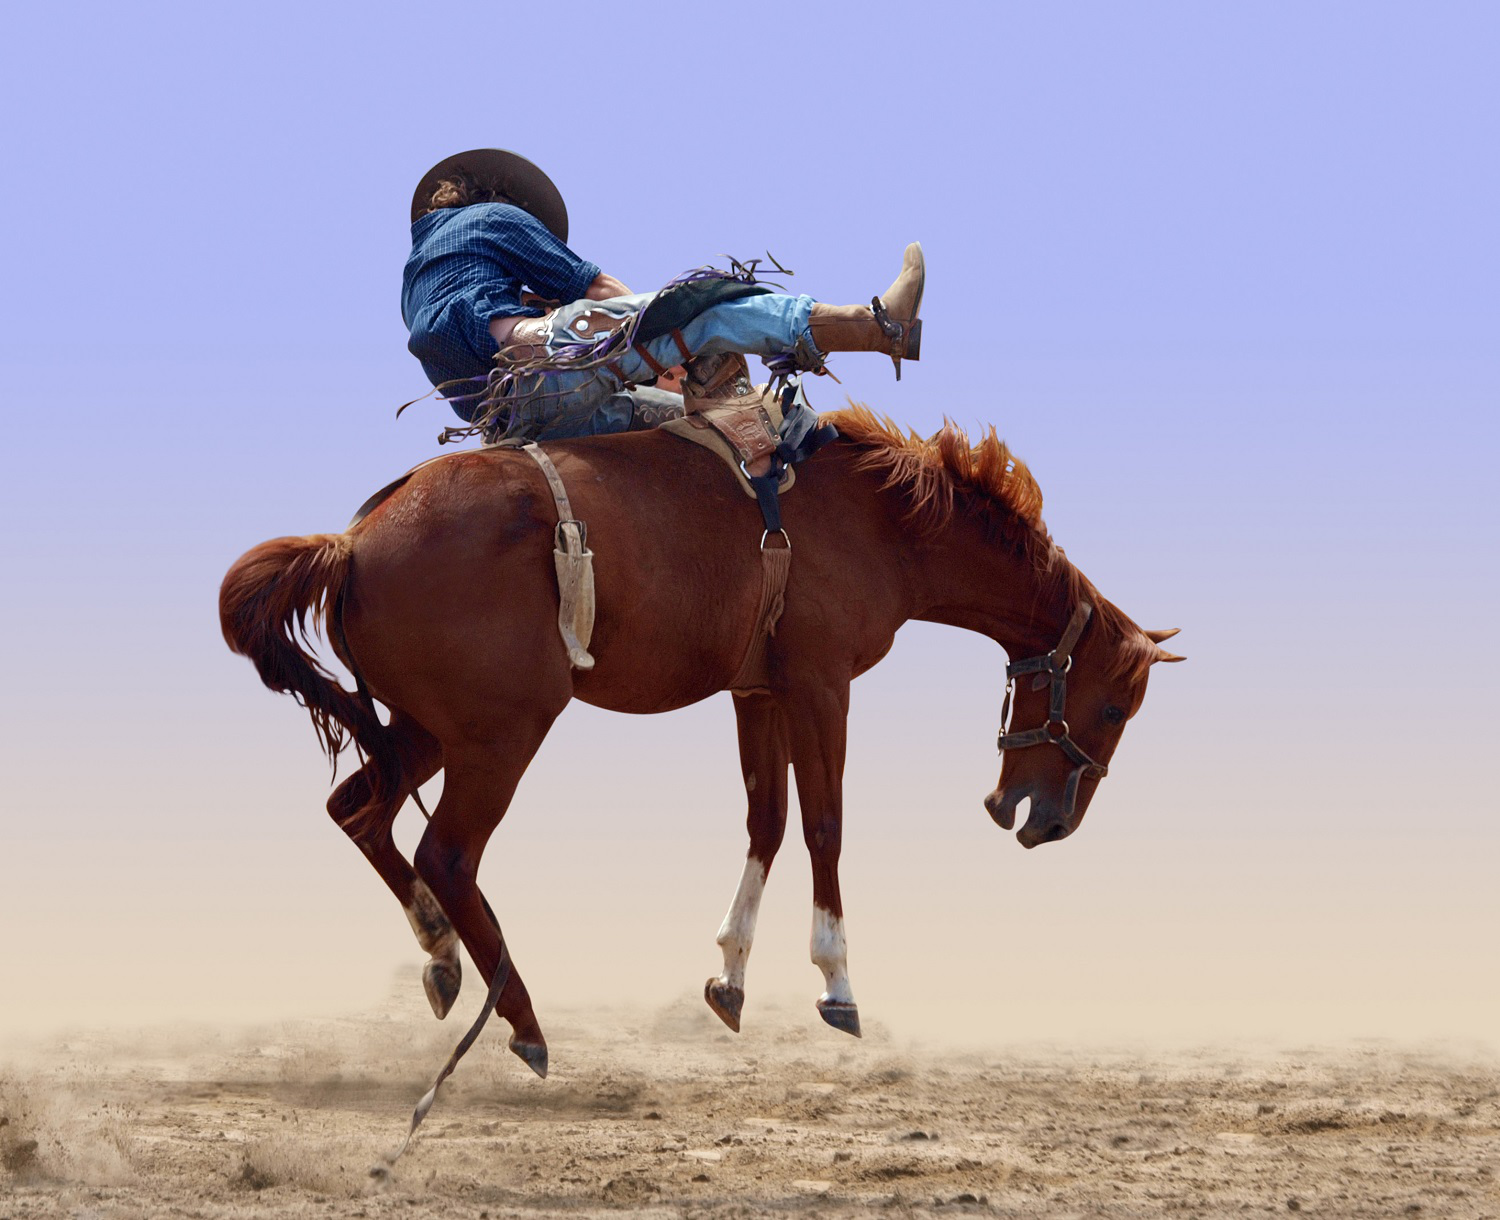

In [22]:

from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([transforms.Resize(256), transforms.ToTensor()])
img = Image.open("../data/p1ch2/horse.jpg")
img

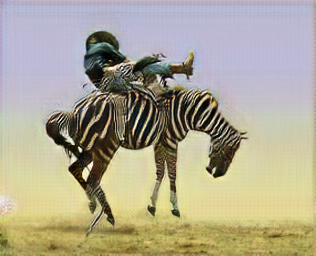

In [23]:

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('./data/p1ch2/zebra.jpg')
out_img

In [26]:
print(out_img)

<PIL.Image.Image image mode=RGB size=316x256 at 0x147B07CD0>


In [27]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1500x1220 at 0x146EF35E0>
